*Authors*: Jacob Gately, Joe Tudor, Matthew Kolessar Wright

*Last Edited*: Nov-27-20

Project Notebook for CS470 Deep Learning Project. Steps through our deep learning model that takes a dataset of images and learns to classify American Sign Language alphabet characters and a few special symbols. 




**Libraries**

In [ ]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
from copy import deepcopy
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv2D, Dense, Dropout, Flatten
import zipfile

**Loading ASL Alphabet Data From Kaggle**\
Found here: https://www.kaggle.com/grassknoted/asl-alphabet

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d grassknoted/asl-alphabet

Saving kaggle.json to kaggle.json
100% 1.02G/1.03G [00:06<00:00, 194MB/s]
100% 1.03G/1.03G [00:07<00:00, 157MB/s]


**Extracting ASL data**

In [ ]:
with zipfile.ZipFile("../content/asl-alphabet.zip", 'r') as zip_ref:
    zip_ref.extractall("")

**Moving Files to Training and Testing Folders**

In [ ]:
labels = ['A', 'B' , 'C' , 'D' , 'del', 'E' , 'F' , 'G' , 'H', 'I', 'J', 'K', 
          'L' ,'M' , 'N', 'nothing', 'O', 'P' , 'Q' , 'R' , 'S' , 'space' , 
          'T' ,'U' , 'V', 'W', 'X' , 'Y' , 'Z']

fileName = ""
basePath = "asl_alphabet_train/asl_alphabet_train/"
uniquePath = ""
fullName = ""
newPath = ""

os.mkdir("asl_final_train"); 
os.mkdir("asl_final_test");

for label in labels:  #Iterate over every label
  for x in range (3000):  #Iterate over every image 
    fileName = label + str(x+1) + ".jpg";
    uniquePath = '/' + label + '/';
    fullName = os.path.basename(basePath + uniquePath + fileName)
    if x >= 2100:
      newFullPath = os.path.join("asl_final_test", fullName);
    else:
      newFullPath = os.path.join("asl_final_train", fullName);
    os.rename(basePath + uniquePath + fileName, newFullPath)


**Creating Labels and Image Data**

In [ ]:
trainDataDir = "asl_final_train"

testDataDir = "asl_final_test"


train_images = []
train_labels = []
label = ""

for image in os.listdir(trainDataDir):
    array = cv2.imread(os.path.join(trainDataDir,image), cv2.IMREAD_COLOR)
    array = cv2.resize(array, (64, 64))
    train_images.append(array)  #Add image to training data
    if image[0] == 'd':
      label = "del";
    elif image[0] == 'n':
      label = "nothing";
    elif image[0] == 's':
      label = "space";
    else:
      label = image[0];
    label = labels.index(label);  
    train_labels.append(label) #Add label to training labels



test_images = []
test_labels = []
label = ""

for image in os.listdir(testDataDir):
    array = cv2.imread(os.path.join(testDataDir,image), cv2.IMREAD_COLOR)
    array = cv2.resize(array, (64, 64))
    test_images.append(array)  #Add image to testing data
    if image[0] == 'd':
      label = "del";
    elif image[0] == 'n':
      label = "nothing";
    elif image[0] == 's':
      label = "space";
    else:
      label = image[0]; 
    label = labels.index(label);   
    test_labels.append(label) #Add label to training labels

#Convert to valid format
train_images = np.array(train_images);
train_labels = np.array(train_labels);
test_images = np.array(test_images);
test_labels = np.array(test_labels);


**Displaying Shape of datasets and size**\
*Distinct labels coorespond to indext of character labels array.*

In [ ]:
print("Shape of the training dataset, number or images and resolution:", train_images.shape)
print("Shape of the testing dataset, number or images and resolution:", test_images.shape)
print("All distinct training labels:", np.unique(train_labels))


Shape of the training dataset, number or images and resolution: (60900, 64, 64, 3)
Shape of the testing dataset, number or images and resolution: (26100, 64, 64, 3)
All distinct training labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


**We plot some of the testing images and their labels to visualize the data**

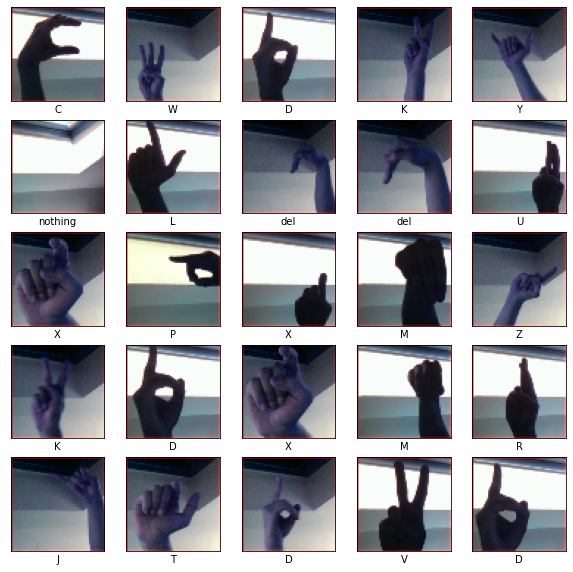

In [ ]:
class_names = ['A', 'B' , 'C' , 'D' , 'del', 'E' , 'F' , 'G' , 'H', 'I', 'J', 'K', 
          'L' ,'M' , 'N', 'nothing', 'O', 'P' , 'Q' , 'R' , 'S' , 'space' , 
          'T' ,'U' , 'V', 'W', 'X' , 'Y' , 'Z']

#plotting stuff
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[test_labels[i]])
plt.show()

**CNN Architecture**\
*As you can see input shape is resized to (64,64) which was needed in order to reduce the time for training and expense on the machine*

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(29))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

Epoch 1/10
1904/1904 [==============================] - 576s 303ms/step - loss: 0.1098 - accuracy: 0.9675 - val_loss: 16.7129 - val_accuracy: 0.3240
Epoch 2/10
1904/1904 [==============================] - 576s 302ms/step - loss: 0.0814 - accuracy: 0.9778 - val_loss: 18.6380 - val_accuracy: 0.3263
Epoch 3/10
1904/1904 [==============================] - 576s 302ms/step - loss: 0.0610 - accuracy: 0.9838 - val_loss: 18.7454 - val_accuracy: 0.3325
Epoch 4/10
1904/1904 [==============================] - 574s 301ms/step - loss: 0.0735 - accuracy: 0.9822 - val_loss: 15.2265 - val_accuracy: 0.3633
Epoch 5/10
1904/1904 [==============================] - 576s 302ms/step - loss: 0.0637 - accuracy: 0.9846 - val_loss: 25.5864 - val_accuracy: 0.3283
Epoch 6/10
1904/1904 [==============================] - 574s 302ms/step - loss: 0.0488 - accuracy: 0.9892 - val_loss: 21.0888 - val_accuracy: 0.3379
Epoch 7/10
1904/1904 [==============================] - 576s 302ms/step - loss: 0.0546 - accuracy: 0.9882 

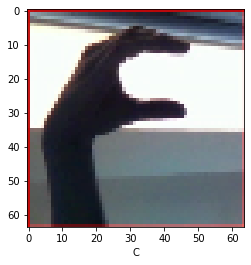

In [ ]:
class_names = ['A', 'B' , 'C' , 'D' , 'del', 'E' , 'F' , 'G' , 'H', 'I', 'J', 'K', 
          'L' ,'M' , 'N', 'nothing', 'O', 'P' , 'Q' , 'R' , 'S' , 'space' , 
          'T' ,'U' , 'V', 'W', 'X' , 'Y' , 'Z']

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CNN_trained = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))

plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[0]])
plt.show()

Our Validation accuracy is very low here which means the model is overfitting to the training set.

**Model with dropout Regularization**\
*The same parameters we kept as the above model but with added dropout regularization to attempt to deal with overfitting to the training set*


In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)))
model2.add(Dropout(0.5))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(Dropout(0.5))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(Dropout(0.5))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(29))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)      

Epoch 1/10
1904/1904 [==============================] - 774s 406ms/step - loss: 2.0188 - accuracy: 0.4953 - val_loss: 3.4436 - val_accuracy: 0.2179
Epoch 2/10
1904/1904 [==============================] - 780s 410ms/step - loss: 0.4947 - accuracy: 0.8382 - val_loss: 4.0986 - val_accuracy: 0.2960
Epoch 3/10
1904/1904 [==============================] - 777s 408ms/step - loss: 0.3345 - accuracy: 0.8909 - val_loss: 3.5330 - val_accuracy: 0.3282
Epoch 4/10
1904/1904 [==============================] - 765s 402ms/step - loss: 0.2742 - accuracy: 0.9149 - val_loss: 3.8137 - val_accuracy: 0.2948
Epoch 5/10
1904/1904 [==============================] - 753s 395ms/step - loss: 0.2479 - accuracy: 0.9237 - val_loss: 3.6510 - val_accuracy: 0.3066
Epoch 6/10
1904/1904 [==============================] - 751s 395ms/step - loss: 0.2304 - accuracy: 0.9317 - val_loss: 4.0264 - val_accuracy: 0.3167
Epoch 7/10
1904/1904 [==============================] - 751s 395ms/step - loss: 0.1954 - accuracy: 0.9414 - val_

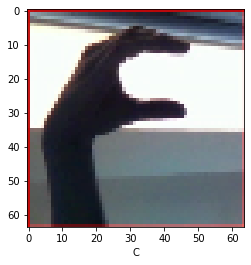

In [ ]:
class_names = ['A', 'B' , 'C' , 'D' , 'del', 'E' , 'F' , 'G' , 'H', 'I', 'J', 'K', 
          'L' ,'M' , 'N', 'nothing', 'O', 'P' , 'Q' , 'R' , 'S' , 'space' , 
          'T' ,'U' , 'V', 'W', 'X' , 'Y' , 'Z']

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
CNN_trained = model2.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))

plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[0]])
plt.show()

**Conclusion**\
Our first CNN model was able to achieve a high level of accuracy on the training data but had a very poor validation accuracy. We constructed a new model with dropout regularization to attempt to deal with overfitting to the training data but unfortunately it only raised the validation accuracy a miniscule amount and drastically lowered our training accuracy.

*Why the low accuracy?*\
We believe that our model has achieved these results because of the dataset we have used. The kaggle dataset is very large but the images to do not have much variation. There is similar lighting in each photo and the same hand is used every time.

*How could we improve?*\
To achieve a higher validation accuracy we would need to use a dataset that has much higher variation. Unfortunately it is very difficult to find an effective way to augment the dataset because some signs with mean different things when they are rotated or skewed. 

In [ ]:

'''
dropout_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])
'''
